# Randomnesss and Probability

1.Import the NumPy library:

In [1]:
import numpy as np
from scipy import stats

2.Create two lists containing four different suits and 13 different ranks in the set of standard cards:

In [6]:
suits = ['H', 'D', 'S', 'C']
ranks = ['A', 'K', 'Q', 'J', '10', '9', '8', '7', '6', '5', '4', '3', '2']

3.Create a list, named cards, containing the 52 cards of the standard deck:

In [9]:
from itertools import product
cards = []
cards = [' of '.join(i) for i in product(ranks, suits)]

4.Use the np.random.choice function to draw a hand (five cards) from the deck. Use replace=False so that each card gets selected only once:

In [12]:
aa = np.random.choice(cards, size=5, replace=False)

In [14]:
list_aa = np.array(aa).tolist()
list_aa

['6 of S', '3 of H', 'J of H', '8 of D', '9 of S']



5.Now, create a function named deal_hands that returns two lists, each with five cards drawn from the same deck. Use replace=False in the np.random.choice function. This function will perform sampling without replacement:

To print the output, run the function like so: deal_hands()


In [16]:
def deal_hands():
    cards_1 = np.random.choice(cards, size=5, replace=False)
    cards_2 = np.random.choice(cards, size=5, replace=False)
    print(cards_1)
    print(cards_2)
deal_hands()

['4 of S' '10 of S' '10 of D' 'J of D' '9 of H']
['9 of C' '9 of D' '8 of S' '2 of S' '6 of D']




6.Create a second function called deal_hands2 that's identical to the last one, but with the replace=True argument in the np.random.choice function. This function will perform sampling with replacement:

7.Finally, run the following code:


In [17]:
def deal_hands2():
    cards_1 = np.random.choice(cards, size=5, replace=True)
    cards_2 = np.random.choice(cards, size=5, replace=True)
    print(cards_1)
    print(cards_2)
deal_hands2()

['8 of D' 'A of S' 'J of C' '8 of C' 'Q of S']
['9 of H' 'K of C' '7 of H' 'Q of D' 'A of H']


# Binomial Distribution


Exercise: Checking If a Random Variable Follows a Binomial Distribution

In this exercise, we will practice how to verify if a random variable follows a binomial distribution. We will also create a random variable using scipy.stats and plot the distribution. This will be a mostly conceptual exercise.

Here, we will check if the random variable, Z: number of defective auto parts in a 12-box pack, follows a binomial distribution (remember that we consider 4% of the auto parts are defective). Follow these steps to complete this exercise:

1.Import NumPy, Matplotlib, and scipy.stats following the usual conventions:


In [18]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

2.Try to conceptually check if Z fulfills the properties given for a binomial random variable:



3.Determine the p and n parameters for the distributions of this variable, that is, p = 0.04 and n = 12.

4.Use the theoretical formula with the former parameters to get the exact theoretical probability of getting exactly one defective piece per box (using x = 1):


In [19]:
(n, p) = (12, 0.04)

In [20]:
stats.binom(n, p)

In [21]:
binomDist = stats.binom(n, p)

In [22]:
binomDist.args

(12, 0.04)

In [26]:
binomDist.pmf(1) # answer to the question 4

0.30635487866488303

In [27]:
#Use formula to calculate it.  ---- same result as above
import math
print('P(Z = 1) = ', (math.factorial(12)/(math.factorial(1)*math.factorial(12-1)))*p**1*(1-p)**(12-1))

P(Z = 1) =  0.3063548786648836


In [24]:
dist = []
print('r\tp(r)')
print()
for i in range(n+1):
    dist.append(binomDist.pmf(i))
    print(str(i) + '\t' + str(binomDist.pmf(i)))

r	p(r)

0	0.6127097573297674
1	0.30635487866488303
2	0.0702063263607024
3	0.00975087866120869
4	0.0009141448744883129
5	6.094299163255422e-05
6	2.9625065376936106e-06
7	1.0580380491762873e-07
8	2.755307419729918e-09
9	5.1024211476480043e-11
10	6.378026434559986e-13
11	4.831838207999973e-15
12	1.6777216000000067e-17


In [25]:
binomDist.cdf(12) # proof that total probbility (area under the curve is 1.0)

1.0

5.Use the scipy.stats module to produce an instance of the Z random variable. Name it Z_rv:

In [29]:
Z_rv = stats.binom(n, p)
Z_rv

6.Plot the probability mass function of Z:

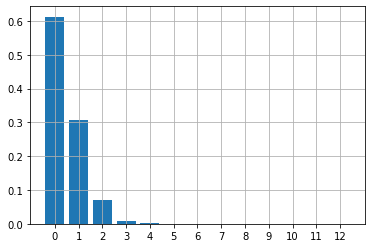

In [30]:
z_possible_values = np.arange(0, n + 1)
Z_probs = Z_rv.pmf(z_possible_values)
fig, ax = plt.subplots()
ax.bar(z_possible_values, Z_probs)
ax.set_xticks(z_possible_values)
ax.grid();

# Normal Distribution


Exercise: Using the Normal Distribution in Education

In this exercise, we'll use a normal distribution object from scipy.stats and the cdf and its inverse, ppf, to answer questions about education.

In psychometrics and education, it is a well-known fact that many variables relevant to education policy are normally distributed. For instance, scores in standardized mathematics tests follow a normal distribution. In this exercise, we'll explore this phenomenon: in a certain country, high school students take a standardized mathematics test whose scores follow a normal distribution with the following parameters: mean = 100, standard deviation = 15. Follow these steps to complete this exercise:

1.Import NumPy, Matplotlib, and scipy.stats following the usual conventions:


In [31]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

2.Use the scipy.stats module to produce an instance of a normally distributed random variable, named X_rv, with mean = 100 and standard deviation = 15:

In [56]:
(mu, sigma) = (100, 15)

In [57]:
normDist = stats.norm(mu, sigma)

In [58]:
normDist.cdf(2)

3.216088292068886e-11

In [59]:
1 - normDist.cdf(130)

0.02275013194817921

In [60]:
normDist.cdf(100)

0.5

3.Plot the probability distribution of X:

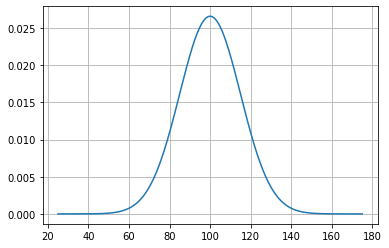

In [39]:
x = np.linspace(25, 175, 1000) # 5 std each direction

y = normDist.pdf(x)

plt.plot(x, y)
plt.grid();

4.The Ministry of Education has decided that the minimum score for someone to be considered competent in mathematics is 80. Use the cdf method to calculate the proportion of students that will get a score above that score:

In [ ]:
# for an IQ value of 80, z=-1.33. From the z-table, P= .0918 

In [62]:
normDist.cdf(80) # z-table ile kucuk fark var. sebebini anlayamadim

0.09121121972586788

In [64]:
-normDist.cdf(80) + normDist.cdf(100)

0.4087887802741321



5.A very selective university wants to set very high standards for high school students that are admitted to their programs. The policy of the university is to only admit students with mathematics scores in the top 2% of the population. Use the ppf method (which is essentially the inverse function of the cdf method) with an argument of 1 - 0.02 = 0.98 to get the cut-off score for admission:


In [ ]:
z-table'a gore, z = 2.055

In [65]:
normDist.ppf(0.98)

130.80623365947733

In this exercise, we used a normal distribution and the cdf and ppf methods to answer real-world questions about education policy.